In [1]:
pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['val-20250924T074735Z-1-001.zip', 'test-20250924T075238Z-1-001.zip', 'train-20250924T075454Z-1-001.zip', 'train', 'test', 'val']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

val-20250924T074735Z-1-001.zip
test-20250924T075238Z-1-001.zip
train-20250924T075454Z-1-001.zip
train
test
val


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [8]:
train_data = data_path+"/train"
print("Contents of train directory:", os.listdir(train_data))

val_data = data_path+"/val"
print("Contents of val directory:", os.listdir(val_data))

test_data = data_path+"/test"
print("Contents of test directory:", os.listdir(test_data))

Contents of train directory: ['train', 'n_00000305_0.wav', 'n_00000306_5000.wav', 'n_00000291_0.wav', 'n_00000298_0.wav', 'n_00000296_0.wav', 'n_00000285_0.wav', 'n_00000296_5000.wav', 'n_00000293_0.wav', 'n_00000288_5000.wav', 'n_00000287_0.wav', 'n_00000286_5000.wav', 'n_00000286_0.wav', 'n_00000276_0.wav', 'n_00000285_5000.wav', 'n_00000300_5000.wav', 'n_00000283_5000.wav', 'n_00000282_5000.wav', 'n_00000284_0.wav', 'n_00000267_0.wav', 'n_00000293_5000.wav', 'n_00000271_0.wav', 'n_00000274_0.wav', 'n_00000269_0.wav', 'n_00000277_5000.wav', 'n_00000268_0.wav', 'n_00000268_5000.wav', 'n_00000264_5000.wav', 'n_00000275_5000.wav', 'n_00000263_0.wav', 'n_00000260_5000.wav', 'n_00000254_5000.wav', 'n_00000266_0.wav', 'n_00000261_5000.wav', 'n_00000262_5000.wav', 'n_00000259_5000.wav', 'n_00000261_0.wav', 'n_00000259_0.wav', 'n_00000265_5000.wav', 'n_00000249_0.wav', 'n_00000257_5000.wav', 'n_00000247_0.wav', 'n_00000257_0.wav', 'n_00000248_5000.wav', 'n_00000246_0.wav', 'n_00000251_5000.w

In [9]:
import zipfile

# Filter filelist to only include zip files
zip_files = [f for f in filelist if f.endswith('.zip')]

for filename in zip_files:
    zip_path = os.path.join(data_path, filename)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

In [10]:
val_data = data_path+"/val"
os.listdir(val_data)

['val',
 'a_00000115_5000.wav',
 'a_00000100_5000.wav',
 'a_00000041_5000.wav',
 'a_00000104_5000.wav',
 'a_00000035_5000.wav',
 'a_00000129_5000.wav',
 'a_00000063_0.wav',
 'a_00000058_0.wav',
 'a_00000102_5000.wav',
 'a_00000114_0.wav',
 'a_00000093_5000.wav',
 'a_00000062_0.wav',
 'a_00000096_5000.wav',
 'a_00000088_0.wav',
 'a_00000036_0.wav',
 'a_00000125_0.wav',
 'a_00000106_5000.wav',
 'a_00000079_0.wav',
 'a_00000047_5000.wav',
 'a_00000135_5000.wav',
 'a_00000074_5000.wav',
 'a_00000116_0.wav',
 'a_00000130_5000.wav',
 'a_00000053_0.wav',
 'a_00000123_5000.wav',
 'a_00000082_0.wav',
 'a_00000117_5000.wav',
 'a_00000064_5000.wav',
 'a_00000045_0.wav',
 'a_00000032_5000.wav',
 'a_00000013_5000.wav',
 'a_00000120_0.wav',
 'a_00000012_0.wav',
 'a_00000022_0.wav',
 'a_00000024_0.wav',
 'a_00000028_5000.wav',
 'a_00000042_5000.wav',
 'a_00000007_0.wav',
 'a_00000001_0.wav',
 'a_00000031_0.wav',
 'a_00000016_0.wav',
 'a_00000018_5000.wav',
 'n_00000376_0.wav',
 'n_00000363_5000.wav',

In [11]:
test_data = data_path+"/test"
os.listdir(test_data)

['test',
 'a_00000068_0.wav',
 'a_00000090_0.wav',
 'a_00000075_0.wav',
 'a_00000126_5000.wav',
 'a_00000057_5000.wav',
 'a_00000073_0.wav',
 'a_00000098_0.wav',
 'a_00000065_0.wav',
 'a_00000101_0.wav',
 'a_00000094_5000.wav',
 'a_00000067_5000.wav',
 'a_00000124_0.wav',
 'a_00000137_0.wav',
 'a_00000078_5000.wav',
 'a_00000087_0.wav',
 'a_00000133_0.wav',
 'a_00000100_0.wav',
 'a_00000083_0.wav',
 'a_00000125_5000.wav',
 'a_00000105_0.wav',
 'a_00000076_0.wav',
 'a_00000122_5000.wav',
 'a_00000099_0.wav',
 'a_00000077_0.wav',
 'a_00000080_0.wav',
 'a_00000055_5000.wav',
 'a_00000074_0.wav',
 'a_00000099_5000.wav',
 'a_00000088_5000.wav',
 'a_00000066_0.wav',
 'a_00000091_0.wav',
 'a_00000124_5000.wav',
 'a_00000019_0.wav',
 'a_00000085_5000.wav',
 'a_00000020_0.wav',
 'a_00000023_5000.wav',
 'a_00000027_5000.wav',
 'a_00000025_5000.wav',
 'a_00000038_0.wav',
 'a_00000052_0.wav',
 'a_00000043_0.wav',
 'a_00000053_5000.wav',
 'a_00000030_5000.wav',
 'a_00000027_0.wav',
 'a_00000026_500

In [12]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [13]:
normal_train

'/content/drive/MyDrive/DST/train/n_*.wav'

In [14]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [15]:
import librosa
import librosa.display

In [16]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [17]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [18]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [19]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [20]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [21]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [22]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [23]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [24]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

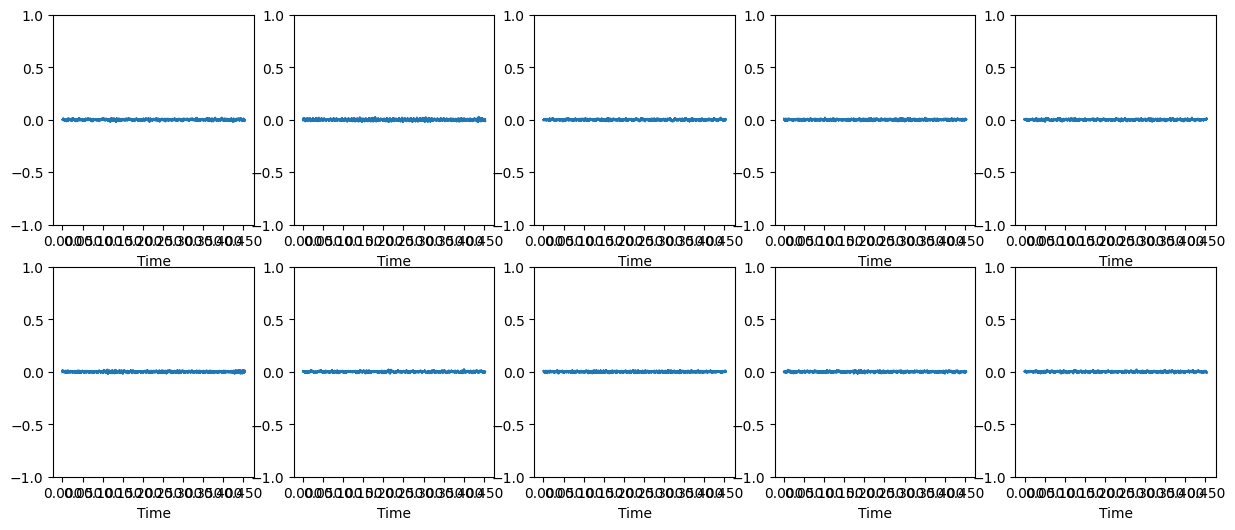

In [25]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

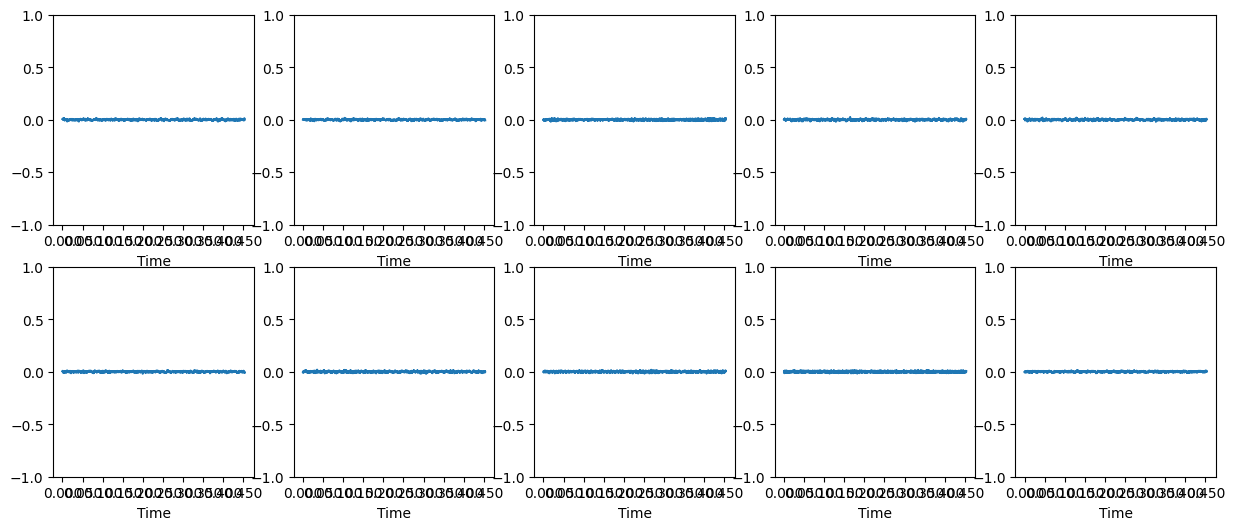

In [26]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [27]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [28]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [29]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [30]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [31]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[3.36914062e-02 1.83636229e+03]
[4.24804688e-02 1.55714798e+03]
[6.93359375e-02 2.27310706e+03]
[3.36914062e-02 1.57827572e+03]


Text(0, 0.5, 'Count')

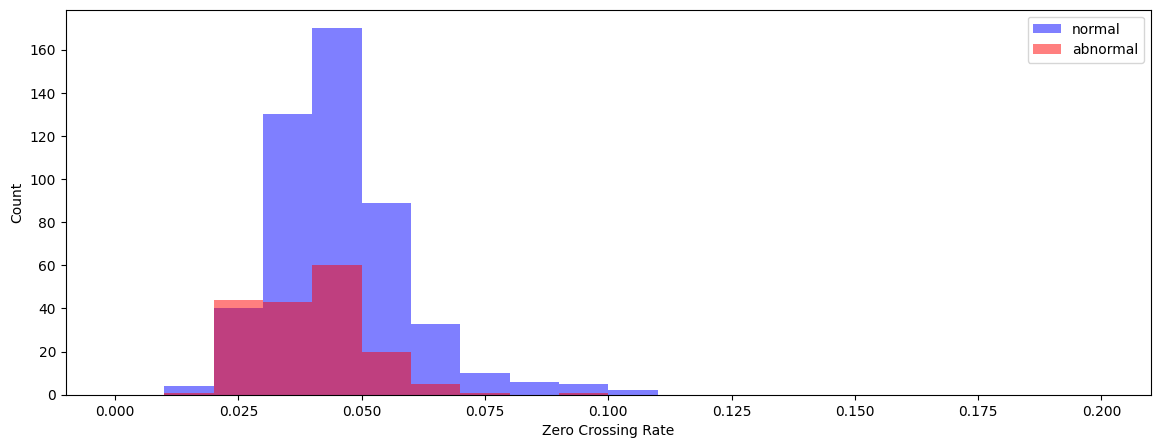

In [32]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

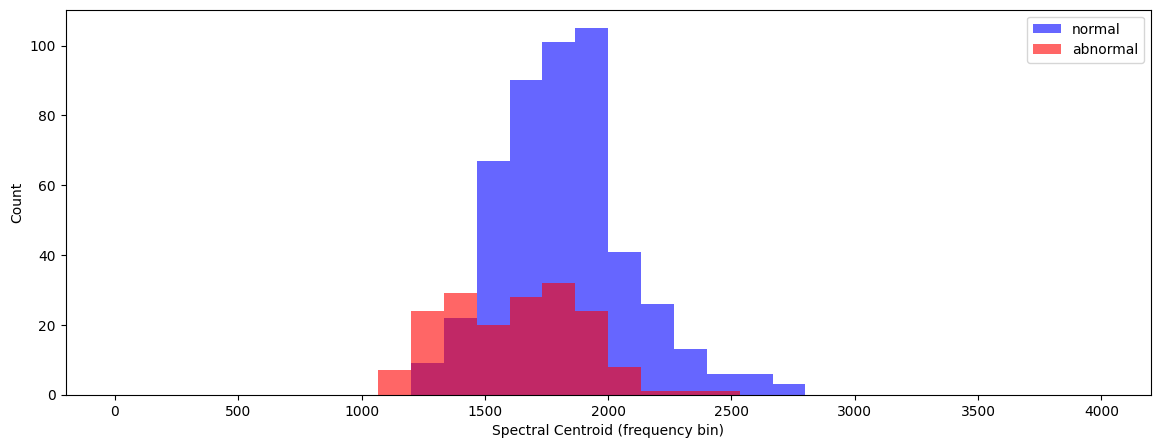

In [33]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [34]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [35]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [36]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [37]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

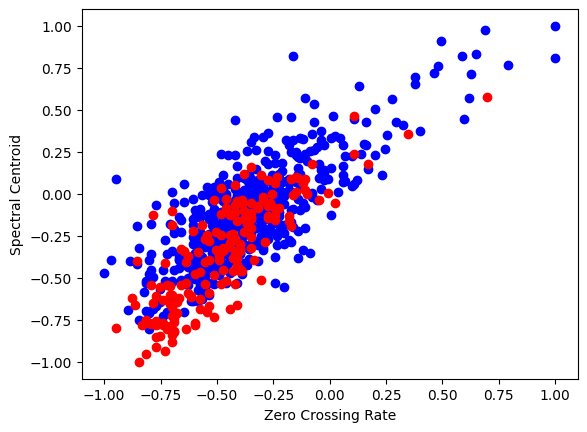

In [38]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [39]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [40]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [41]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [43]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [44]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [46]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [47]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2795 - loss: 0.7805 - val_accuracy: 0.3193 - val_loss: 0.7291
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4715 - loss: 0.7312 - val_accuracy: 0.6386 - val_loss: 0.6809
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6147 - loss: 0.6828 - val_accuracy: 0.7349 - val_loss: 0.6507
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7089 - loss: 0.6532 - val_accuracy: 0.7229 - val_loss: 0.6309
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7106 - loss: 0.6393 - val_accuracy: 0.7169 - val_loss: 0.6180
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7148 - loss: 0.6265 - val_accuracy: 0.7108 - val_loss: 0.6082
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7123 - loss: 0.6178 - val_accuracy: 0.7108 - val_loss: 0.6011
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7029 - loss: 0.6208 - val_accu

In [49]:
import plotly
import plotly.graph_objs as go

In [50]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [51]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [53]:
file_name = os.path.join(train_data, 'a_00000004_5000.wav')
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


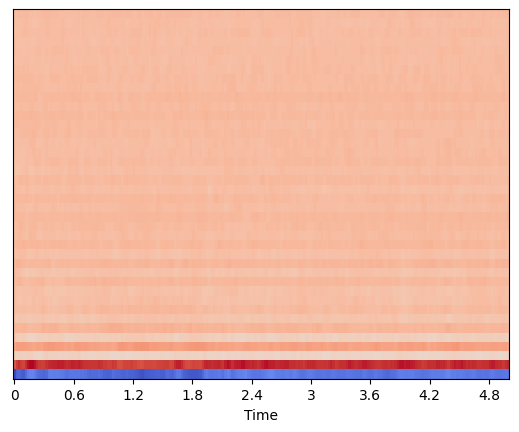

In [54]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [55]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [56]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [57]:
normal_train_features[0].shape

(40, 216)

In [58]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [59]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [60]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [61]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [62]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [63]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [64]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [65]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [ ]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [69]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6405 - loss: 3.0523
Epoch 1: val_loss improved from inf to 0.47684, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.6417 - loss: 2.9639 - val_accuracy: 0.7952 - val_loss: 0.4768
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7470 - loss: 0.7922
Epoch 2: val_loss did not improve from 0.47684
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - accuracy: 0.7487 - loss: 0.7851 - val_accuracy: 0.7771 - val_loss: 0.5769
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8226 - loss: 0.5032
Epoch 3: val_loss did not improve from 0.47684
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.8233 - loss: 0.5013 - val_accuracy: 0.7771 - val_loss: 0.6786
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8386 - loss: 0.4773
Epoch 4: val_loss did not improve from 0.47684
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.8381 - loss: 0.4802 - val_ac

In [70]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [71]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [72]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [73]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1776, acc: 0.9232
Validation- loss: 0.1973, acc: 0.9337


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [75]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 11  36]]


In [76]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9154    1.0000    0.9558       119
    abnormal     1.0000    0.7660    0.8675        47

    accuracy                         0.9337       166
   macro avg     0.9577    0.8830    0.9116       166
weighted avg     0.9393    0.9337    0.9308       166



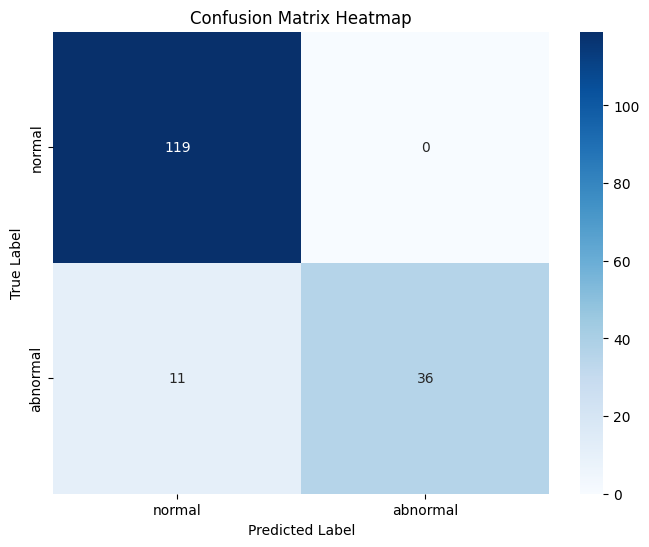

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Unzip the data files

### Subtask:
Unzip the train, validation, and test zip files in the `data_path`.


**Reasoning**:
Import the zipfile module and then iterate through the zip files in the data_path to extract their contents.



In [79]:
import zipfile

# Filter filelist to only include zip files
zip_files = [f for f in filelist if f.endswith('.zip')]

for filename in zip_files:
    zip_path = os.path.join(data_path, filename)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

## List directory contents

### Subtask:
List the contents of the unzipped directories to confirm they are accessible.


**Reasoning**:
List the contents of the unzipped directories to confirm they are accessible.



In [80]:
train_data = data_path+"/train"
print("Contents of train directory:", os.listdir(train_data))

val_data = data_path+"/val"
print("Contents of val directory:", os.listdir(val_data))

test_data = data_path+"/test"
print("Contents of test directory:", os.listdir(test_data))

Contents of train directory: ['train', 'n_00000305_0.wav', 'n_00000306_5000.wav', 'n_00000291_0.wav', 'n_00000298_0.wav', 'n_00000296_0.wav', 'n_00000285_0.wav', 'n_00000296_5000.wav', 'n_00000293_0.wav', 'n_00000288_5000.wav', 'n_00000287_0.wav', 'n_00000286_5000.wav', 'n_00000286_0.wav', 'n_00000276_0.wav', 'n_00000285_5000.wav', 'n_00000300_5000.wav', 'n_00000283_5000.wav', 'n_00000282_5000.wav', 'n_00000284_0.wav', 'n_00000267_0.wav', 'n_00000293_5000.wav', 'n_00000271_0.wav', 'n_00000274_0.wav', 'n_00000269_0.wav', 'n_00000277_5000.wav', 'n_00000268_0.wav', 'n_00000268_5000.wav', 'n_00000264_5000.wav', 'n_00000275_5000.wav', 'n_00000263_0.wav', 'n_00000260_5000.wav', 'n_00000254_5000.wav', 'n_00000266_0.wav', 'n_00000261_5000.wav', 'n_00000262_5000.wav', 'n_00000259_5000.wav', 'n_00000261_0.wav', 'n_00000259_0.wav', 'n_00000265_5000.wav', 'n_00000249_0.wav', 'n_00000257_5000.wav', 'n_00000247_0.wav', 'n_00000257_0.wav', 'n_00000248_5000.wav', 'n_00000246_0.wav', 'n_00000251_5000.w

## Define data paths

### Subtask:
Update the `train_data`, `val_data`, and `test_data` variables to point to the unzipped directories.


## Summary:

### Data Analysis Key Findings

* The data files were successfully unzipped from their original compressed format.
* The contents of the unzipped 'train', 'val', and 'test' directories were listed, confirming that the unzipped data is accessible.
* The variables `train_data`, `val_data`, and `test_data` were confirmed to be correctly pointing to the unzipped directories, indicating no further path updates were needed.


In [104]:
test_data = os.path.join(data_path, "test")

In [112]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [113]:
normal_test_files   = glob.glob(os.path.join(test_data, "n_*.wav"))
abnormal_test_files = glob.glob(os.path.join(test_data, "a_*.wav"))

normal_test_features   = [extract_features(f) for f in normal_test_files]
abnormal_test_features = [extract_features(f) for f in abnormal_test_files]

In [114]:
X_test = np.vstack((normal_test_features, abnormal_test_features)).astype("float32")
y_test = np.array([0]*len(normal_test_features) + [1]*len(abnormal_test_features))
y_test_cat = to_categorical(y_test, num_classes=2)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [115]:
test_res = model.evaluate(X_test, y_test_cat, verbose=1, return_dict=True)
print(f"Test - loss: {test_res['loss']:.4f}, acc: {test_res['accuracy']:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9738 - loss: 0.1145
Test - loss: 0.1460, acc: 0.9423


In [116]:
y_pred = model.predict(X_test, verbose=0)
y_pred_cl = np.argmax(y_pred, axis=1)

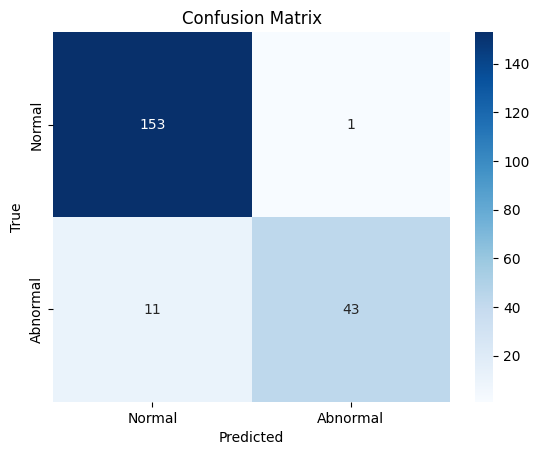

In [117]:
cm = confusion_matrix(y_test, y_pred_cl)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Abnormal"],
            yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [118]:
print(classification_report(y_test, y_pred_cl, target_names=["Normal","Abnormal"]))

              precision    recall  f1-score   support

      Normal       0.93      0.99      0.96       154
    Abnormal       0.98      0.80      0.88        54

    accuracy                           0.94       208
   macro avg       0.96      0.89      0.92       208
weighted avg       0.94      0.94      0.94       208

